In [2]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

identifiers  = ['3-Methylheptane', 'Aspirin', 'Diethylsulfate', 'Diethyl sulfate', '50-78-2', 'Adamant']

for ids in identifiers :
    print(ids, CIRconvert(ids))


3-Methylheptane CCCCC(C)CC
Aspirin CC(=O)Oc1ccccc1C(O)=O
Diethylsulfate CCO[S](=O)(=O)OCC
Diethyl sulfate CCO[S](=O)(=O)OCC
50-78-2 CC(=O)Oc1ccccc1C(O)=O
Adamant Did not work


In [4]:
# pd load noncanonical_AAs.csv
import pandas as pd

df = pd.read_csv('noncanonical_AAs.csv')
list(df['IUPAC Name'])


['(2R)-2-amino-3-selanylpropanoic acid',
 'N6-[[(2R,3R)-3-methyl-3,4-dihydro-2H-pyrrol-2-yl]carbonyl]-L-lysine',
 '(2S,3S)-3-hydroxypyrrolidine-2-carboxylic acid',
 '(2S,4R)-4-hydroxypyrrolidine-2-carboxylic acid',
 '(2S)-2-amino-3-phosphonooxypropanoic acid',
 '(2S,3R)-2-amino-3-phosphonooxybutanoic acid',
 '(2S)-2,5-diaminopentanoic acid',
 '(2S)-2-amino-5-(carbamoylamino)pentanoic acid',
 '(2S)-2-[[N′-[(4S)-4-amino-4-carboxybutyl]carbamimidoyl]amino]butanedioic acid',
 '(2S)-2-amino-4-[[(2S,3S,4R,5R)-5-(6-aminopurin-9-yl)-3,4-dihydroxyoxolan-2-yl]methyl-methylsulfonio]butanoate',
 '(2S)-2-amino-4-[[(2S,3S,4R,5R)-5-(6-aminopurin-9-yl)-3,4-dihydroxyoxolan-2-yl]methyl-sulfanyl]butanoate',
 '(2R)-2-amino-3-hydroxy-3-oxopropane-1-sulfinate',
 '(2S)-2-amino-4-sulfanylbutanoic acid',
 '2-aminoethanesulfonic acid',
 '2-(methylamino)acetic acid',
 '2-aminobenzoic acid',
 '4-oxo-1H-quinoline-2-carboxylic acid',
 '(2S)-2-aminohexanedioic acid',
 '(2S)-2-amino-4-hydroxybutanoic acid',
 '3-amino

In [7]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

# identifiers  = list(df['IUPAC Name'])
identifiers = ['3-(aminomethyl)cyclobutane-1-carboxylic acid']
# ['(2S)-2-amino-4-methyltellanylbutanoic acid',
# 'cis-(1S,3S)-3-(aminomethyl)cyclobutane-1-carboxylic acid',
# '6-aminohexanoic acid',
# '(2S)-2-amino-3-(4-fluorophenyl)propanoic acid',
# '(2S)-2-amino-3-(5-fluoro-1H-indol-3-yl)propanoic acid']


for ids in identifiers :
    print(ids, CIRconvert(ids))


3-(aminomethyl)cyclobutane-1-carboxylic acid NCC1CC(C1)C(O)=O


In [16]:
# pd load noncanonical_AAs.csv
import pandas as pd
from rdkit import Chem

df2 = pd.read_csv('noncanonical_AAs.csv')


df2['canonical_smiles'] = ''

for i in range(len(df2)):
    df2['canonical_smiles'][i] = Chem.MolToSmiles(Chem.MolFromSmiles(df2['Smiles'][i]))

# generate molecular weight and formula for each amino acid
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors


df2['MW'] = ''
df2['formula'] = ''

# use list coprehension
df2['MW'] = [Descriptors.ExactMolWt(Chem.MolFromSmiles(x)) for x in df2['Smiles']]
df2['formula'] = [rdMolDescriptors.CalcMolFormula(Chem.MolFromSmiles(x)) for x in df2['Smiles']]


df2.to_csv('noncanonical_AAs_full.csv', index=False)


/tmp/ipykernel_916760/999626260.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['canonical_smiles'][i] = Chem.MolToSmiles(Chem.MolFromSmiles(df2['Smiles'][i]))
/tmp/ipykernel_916760/999626260.py:11: SettingWithCopyWarning: 
A value 

In [11]:
import csv

# Path to the output CSV file
output_csv_file_path = 'aminos_output.csv'

# Define the headers for the CSV based on the dictionary structure
headers = ['Name', 'Code', 'Formula', 'Letter', 'MolWeight', 'SMILES', 'cterm', 'disulphide', 'ester', 'nterm']

# Open the CSV file for writing
with open(output_csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    # Create a CSV writer object
    writer = csv.DictWriter(file, fieldnames=headers)
    
    # Write the header row
    writer.writeheader()
    
    # Iterate over each item in the aminos dictionary
    for name, data in aminos.items():
        # Prepare the row to be written in the CSV
        row = {
            'Name': name,
            'Code': data['Code'],
            'Formula': data['Formula'],
            'Letter': data['Letter'],
            'MolWeight': data['MolWeight'],
            'SMILES': data['SMILES'],
            'cterm': str(data['cterm']),
            'disulphide': str(data['disulphide']),
            'ester': str(data['ester']),
            'nterm': str(data['nterm'])
        }
        # Write the row to the CSV file
        writer.writerow(row)

print(f"Data successfully written to {output_csv_file_path}")


Data successfully written to aminos_output.csv


In [ ]:
import csv

# Path to the CSV file
csv_file_path = 'aminos.csv'

# Create an empty dictionary to store the amino acids data
aminos = {}

# Open the CSV file
with open(csv_file_path, mode='r', newline='', encoding='utf-8') as file:
    # Create a CSV reader object
    reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in reader:
        # Retrieve the amino acid name and remove any underscores for consistent formatting
        amino_name = row['Name'].replace('_', ' ')
        
        # Create a dictionary for the current amino acid
        aminos[amino_name] = {
            "Code": row['Code'],
            "Formula": row['Formula'],
            "Letter": row['Letter'],
            "MolWeight": row['MolWeight'],
            "SMILES": row['SMILES'],
            "cterm": row['cterm'] == 'True',
            "disulphide": row['disulphide'] == 'True',
            "ester": row['ester'] == 'True',
            "nterm": row['nterm'] == 'True',
        }

# Print the dictionary to see the output
print(aminos)



In [43]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

# Define the dictionary to store the noncanonical amino acids
noncanonical_aminos = {}

# Open the CSV file
all_aas = pd.read_csv('all_sidechains_D+L.csv', delimiter='\t')


# Iterate through each row in the CSV file
for i in range(len(all_aas)):
    # print(i)
    # Extract relevant information from each row
    smiles = all_aas[f'Fixed SMILES'][i]
    name = all_aas['Name'][i]
    code = all_aas['Code'][i]
    letter = all_aas['Letter'][i].strip()
    formula = rdMolDescriptors.CalcMolFormula(Chem.MolFromSmiles(smiles))
    mol_weight = Descriptors.ExactMolWt(Chem.MolFromSmiles(smiles))
    
    # Create the dictionary structure for each amino acid
    noncanonical_aminos[name] = {
        'Code': code,
        'Formula': formula,
        'Letter': letter,
        'MolWeight': mol_weight,
        'SMILES': smiles,
        'cterm': False,
        'disulphide': False,
        'ester': False,
        'nterm': False
    }

# Print the resulting dictionary
noncanonical_aminos


{'Alanine': {'Code': 'ALA',
  'Formula': 'C3H7NO2',
  'Letter': 'A',
  'MolWeight': 89.047678464,
  'SMILES': 'N[C@@H](C)C(=O)O',
  'cterm': False,
  'disulphide': False,
  'ester': False,
  'nterm': False},
 'Arginine': {'Code': 'ARG',
  'Formula': 'C6H14N4O2',
  'Letter': 'R',
  'MolWeight': 174.111675688,
  'SMILES': 'N[C@@H](CCCNC(=N)N)C(=O)O',
  'cterm': False,
  'disulphide': False,
  'ester': False,
  'nterm': False},
 'Aspargine': {'Code': 'ASN',
  'Formula': 'C4H8N2O3',
  'Letter': 'N',
  'MolWeight': 132.053492116,
  'SMILES': 'N[C@@H](CC(=O)N)C(=O)O',
  'cterm': False,
  'disulphide': False,
  'ester': False,
  'nterm': False},
 'Aspartate': {'Code': 'ASP',
  'Formula': 'C4H7NO4',
  'Letter': 'D',
  'MolWeight': 133.037507704,
  'SMILES': 'N[C@@H](CC(=O)O)C(=O)O',
  'cterm': False,
  'disulphide': False,
  'ester': False,
  'nterm': False},
 'Cysteine': {'Code': 'CYS',
  'Formula': 'C3H7NO2S',
  'Letter': 'C',
  'MolWeight': 121.019749464,
  'SMILES': 'N[C@@H](CS)C(=O)O',
  

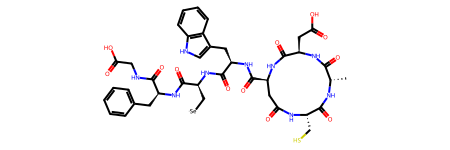

In [3]:
# read and show sdf file
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Load the SDF file
suppl = Chem.SDMolSupplier('out_special.sdf')

# Iterate over each molecule in the SDF file
for mol in suppl:
    # Check if the molecule is not None
    if mol is not None:
        # Generate the 2D coordinates for the molecule
        AllChem.Compute2DCoords(mol)
        # Display the molecule
        display(mol)
        # Draw the molecule
        Draw.MolToImage(mol)
    else:
        print("Molecule not found")

In [131]:
from rdkit import Chem
import pandas as pd

# load csv file
df_allsc = pd.read_csv('all_sidechains_D+L.csv', sep=',')
df_allsc



,L-Code,Name,D-Code,D-code-PDB,Molecular_weight,LogP,Sidechain_logP,Volume,Sidechain_volume,pKa,SMILES,Fixed SMILES,Pubchem#,D-Pubchem#,CAS,D-CAS,family,natural
0,ALA,Alanine,DAL,DAL,90.10,-2.85,1.09,107.08,21.42,2.35_9.87,[NH3][C@@H](C)C(=O)O,[NH3][C@@H](C)C(=O)O,5950.0,71080.0,56-41-7,338-69-2,alanine,natural
1,ARG,Arginine,DAR,DAR,176.22,-4.2,-0.05_(predicted),204.07,118.41,2.01_9.04_12.48,[NH3][C@@H](CCCNC(=[NH2])N)C(=O)O,[NH3][C@@H](CCCNC(=[NH2])N)C(=O)O,6322.0,71070.0,74-79-3,157-06-2,arginine,natural
2,ASN,Aspargine,DSG,DSG,133.13,-3.82,-1.26,142.64,56.97,2.02_8.8,[NH3][C@@H](CC(=O)N)C(=O)O,[NH3][C@@H](CC(=O)N)C(=O)O,6267.0,439600.0,70-47-3,2058-58-4,asparagine,natural
3,ASP,Aspartate,DAS,DAS,134.11,-3.68,-0.17,137.99,52.33,2.1_9.82_3.9,[NH3][C@@H](CC(=O)O)C(=O)O,[NH3][C@@H](CC(=O)O)C(=O)O,5960.0,83887.0,56-84-8,1783-96-6,aspartic,natural
4,CYS,Cysteine,DCY,DCY,122.17,-2.5,0.51_(predicted),126.70,41.04,2.05_10.25_10.78,[NH3][C@@H](CS)C(=O)O,[NH3][C@@H](CS)C(=O)O,5862.0,92851.0,52-90-4,921-01-7,cysteine,natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,DUN1,2-Aminoadipic acid,NaN,NaN,162.16,-3.15_(predicted),0.79,179.36,93.69,2.01_9.53_4.29_(predicted),OC(=O)CCC[C@@H](C(=O)O)[NH3],NaN,92136.0,NaN,542-32-5,7620-28-2,aspartic,non-natural
457,DVAH,Hydroxynorvaline,NaN,NaN,133.15,-2.21_(predicted),0.25,155.79,70.13,2.34_8.99_(predicted),CC[C@H]([C@@H]([C](=O)=O)[NH3])O,NaN,65097.0,65097.0,34042-00-7,34042-00-7,serine,non-natural
458,DWFP,"3,5-Difluoro-phenylalanine",NaN,NaN,202.18,-1.21_(predicted),2.49_(predicted),208.53,122.87,1.4_9.38_(predicted),[NH3][C@H](C(=O)O)Cc1cc(F)cc(c1)F,NaN,716307.0,716310.0,31105-91-6,266360-63-8,phenylalanine,non-natural
459,DYCM,cysteine-s-acetamide,NaN,NaN,179.22,-3.77_(predicted),-0.18_(predicted),187.98,102.32,2.08_8.83_(predicted),NC(=O)CSC[C@@H](C(=O)O)[NH3],NaN,95482.0,95482.0,17528-66-4,17528-66-4,asparagine,non-natural


In [133]:
# merge df_allsc and df
merged_df = pd.merge(df_allsc, df, left_on='L-Code', right_on='file', how='left')



In [134]:
# save the merged df to csv
merged_df.to_csv('merged_df.csv', index=False)

In [42]:
from PepLibGen.StructGen.aminoacids import all_aminos

all_aminos

{'Alanine': {'Code': 'ALA',
  'Formula': 'C3H7NO2',
  'Letter': 'A',
  'MolWeight': 89.047678464,
  'SMILES': 'N[C@@H](C)C(=O)O',
  'cterm': False,
  'disulphide': False,
  'ester': False,
  'nterm': False},
 'Arginine': {'Code': 'ARG',
  'Formula': 'C6H14N4O2',
  'Letter': 'R',
  'MolWeight': 174.111675688,
  'SMILES': 'N[C@@H](CCCNC(=N)N)C(=O)O',
  'cterm': False,
  'disulphide': False,
  'ester': False,
  'nterm': False},
 'Aspargine': {'Code': 'ASN',
  'Formula': 'C4H8N2O3',
  'Letter': 'N',
  'MolWeight': 132.053492116,
  'SMILES': 'N[C@@H](CC(=O)N)C(=O)O',
  'cterm': False,
  'disulphide': False,
  'ester': False,
  'nterm': False},
 'Aspartate': {'Code': 'ASP',
  'Formula': 'C4H7NO4',
  'Letter': 'D',
  'MolWeight': 133.037507704,
  'SMILES': 'N[C@@H](CC(=O)O)C(=O)O',
  'cterm': False,
  'disulphide': False,
  'ester': False,
  'nterm': False},
 'Cysteine': {'Code': 'CYS',
  'Formula': 'C3H7NO2S',
  'Letter': 'C',
  'MolWeight': 121.019749464,
  'SMILES': 'N[C@@H](CS)C(=O)O',
  

In [17]:
# generate a fasta file with 10M sequences
from PepLibGen.StructGen.aminoacids import all_aminos

letter_list = []
for each in all_aminos:
    letter_list+=(all_aminos[each]['Letter'])

canonical_list = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
lower_canonical_list = [x.lower() for x in canonical_list]
# remove g
lower_canonical_list.remove('g')
len(lower_canonical_list)

19

In [6]:
# convert all items in letter_list to uppercase, and select unique items
upper_noncon_list = list(set([x.upper() for x in letter_list]))
print(len(upper_noncon_list))
# remove canonical amino acids from the list
upper_noncon_list = [x for x in upper_noncon_list if x not in [x.upper() for x in canonical_list]]
len(upper_noncon_list)
# for item in upper_noncon_list:
#     print(item)


227


207

In [7]:
# convert all items in letter_list to uppercase, and select unique items
lower_noncon_list = list(set([x.lower() for x in letter_list]))
print(len(lower_noncon_list))
# remove canonical amino acids from the list
lower_noncon_list = [x for x in lower_noncon_list if x not in [x.lower() for x in canonical_list]]
# remove 'g' from the list
len(lower_noncon_list)
# for item in lower_noncon_list:
#     print(item)


227


207

In [8]:
# find the same amino acids in both lists
list(set(upper_noncon_list).intersection(lower_noncon_list))

['ẟ']

In [22]:
print(len(letter_list))
print(len(upper_noncon_list), len(lower_noncon_list)-1, len(canonical_list), len(lower_canonical_list))
print(207+206+20+19)

452
207 206 20 19
452


In [23]:
len(all_aminos)

452

In [94]:
import random

# select a random digit
random.randint(0, 9)

2

In [116]:
# generate a sequence that is 80% canonical and 20% noncanonical
import random

# define the length of the sequence
seq_len = random.randint(1,100)

# define the percentage of canonical amino acids
canonical_percent = 0.9

# define the percentage of lower case amino acids
lowercase_percent = 0.1

####################################################

# calculate the percentage of noncanonical amino acids
noncanonical_percent = 1 - canonical_percent

# define the number of canonical and noncanonical amino acids
num_canonical = int(seq_len * canonical_percent)
num_noncanonical = seq_len - num_canonical

# generate a list of canonical and noncanonical amino acids
canonical_amino_acids = random.choices(canonical_list, k=num_canonical)
noncanonical_amino_acids = random.choices(upper_noncon_list, k=num_noncanonical)

# combine the canonical and noncanonical amino acids
sequence = canonical_amino_acids + noncanonical_amino_acids

# shuffle the sequence
random.shuffle(sequence)

# join the amino acids to form the final sequence
upper_sequence = ''.join(sequence)

# make 10% of the sequence lowercase
lowercase_positions = random.sample(range(seq_len), int(seq_len * lowercase_percent))
final_sequence = ''
for i in range(seq_len):
    if i in lowercase_positions:
        final_sequence += upper_sequence[i].lower()
    else:
        final_sequence += upper_sequence[i]

# print the final sequence
print(final_sequence)





TSWISAYDLMvKLCNTwIẺḢEkHŒGYDDVWLCdCḚArẎHĠMPKQYCCWVINCĴHHNKYKFMMŠIRQYMNiHLSHATDSEKnCKEaRẢ


In [1]:
from PepLibGen.StructGen.aminoacids import all_aminos
# get all SMILES from all_aminos
smiles_list = []
for each in all_aminos:
    smiles_list.append(all_aminos[each]['SMILES'])

smiles_list

['N[C@@H](c1ccccc1)C(=O)O',
 'N[C@@H](Cc1ccc(OC)cc1)C(=O)O',
 'N[C@@H](Cc1c[nH]c2c1cccc2O)C(=O)O',
 'N[C@@H](Cc1ccc(cc1)C(=N)N)C(=O)O',
 'N[C@@H](Cc1ccc(cc1)Cl)C(=O)O',
 'N[C@@H](CCCC(C(=O)O)=O)C(=O)O',
 'N[C@H]([C@H](C)(C(=O)O))C(=O)O',
 'N[C@@H](CCSC(F)F)C(=O)O',
 'N[C@@H](C[C@@H]1CN[C@@H](N1)F)C(=O)O',
 'N[C@@H](Cc1cnc(F)N1)C(=O)O',
 'N[C@@H](Cc1c[nH]c(n1)F)C(=O)O',
 'N[C@@H](CCCC(=C)C(=O)O)C(=O)O',
 'N[C@H](Cc1c[nH]c2c1scc2)C(=O)O',
 'N[C@@H](Cc1cccc(C#N)c1)C(=O)O',
 'N[C@@H](c1cc(O)cc(c1)O)C(=O)O',
 'N[C@@H](C[C@@H](C(=O)O)O)C(=O)O',
 'N[C@H](Cc1ccc(c(c1)Cl)O)C(=O)O',
 'N[C@@H](Cc1ccc(cc1)Br)C(=O)O',
 'N[C@@H](Cc1ccc(cc1)C#N)C(=O)O',
 'N[C@@H](CCSC#N)C(=O)O',
 'N[C@@H](Cc1c[nH]c2c1c(F)ccc2)C(=O)O',
 'N[C@@H](Cc1ccc(CO)cc1)C(=O)O',
 'N[C@@H](Cc1c[nH]c2c1c(O)ccc2)C(=O)O',
 'N[C@@H](Cc1c[nH]c2c1c(N)ccc2)C(=O)O',
 'N[C@@H](Cc1ccc(cc1)C)C(=O)O',
 'N[C@@H](CCC[C@H](C(=O)O)N)C(=O)O',
 'N[C@@H](Cc1c[nH]c2c1ccc(c2)Cl)C(=O)O',
 'N[C@@H](CCCO)C(=O)O',
 'N[C@@H](CC)C(=O)O',
 'N[C@@H](CC[C@@H]

In [2]:
# find unmatched parenthesis in the SMILES
import re

# count ( and ) in each SMILES
for smiles in smiles_list:
    open_parenthesis = re.findall(r'\(', smiles)
    close_parenthesis = re.findall(r'\)', smiles)
    if len(open_parenthesis) != len(close_parenthesis):
        print(smiles)


In [4]:
import os

# define the input file and output directory
input_file = '10M_seqs.fasta'
output_dir = 'split_files'

# define number of files to split into
num_files = 10

# create the output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# function to determine the number of sequences
def count_sequences(filename):
    count = 0
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('>'):
                count += 1
    return count

# get total number of sequences
total_seqs = count_sequences(input_file)
seqs_per_file = total_seqs // num_files

# split the file
with open(input_file, 'r') as file:
    current_file = 1
    current_seq_count = 0
    output_file = open(f'{output_dir}/output_{current_file}.fasta', 'w')
    for line in file:
        if line.startswith('>'):
            if current_seq_count == seqs_per_file:
                if current_file < num_files:  # ensure we do not create extra files
                    output_file.close()
                    current_file += 1
                    current_seq_count = 0
                    output_file = open(f'{output_dir}/output_{current_file}.fasta', 'w')
        output_file.write(line)
        if line.startswith('>'):
            current_seq_count += 1
    output_file.close()



In [27]:
# add N-methylation to 10% of peptidic bonds
import random
import math

# define the sequence
seq = 'N3[C@@H](CS)C(=O)N[C@@H](C)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](Cc1c[nH]c2c1cccc2)C(=O)N[C@@H](Cc1ccc(cc1)C)C(=O)N[C@@H](Cc1c[nH]c2c1cccc2)C(=O)N[C@@H](Cc1ccccc1)C(=O)NCC3(=O)'

# define the percentage of N-methylation
methylation_percent = 0.2

# count number of 'C(=O)N[C@' in seq
num_peptidic_bonds = seq.count('C(=O)N[C@')

# calculate the number of peptidic bonds to methylate
num_methylate = math.ceil(num_peptidic_bonds * methylation_percent)

# find index of all 'C(=O)N[C@' in the sequence
peptidic_bond_positions = [m.start() for m in re.finditer('C\\(\\=O\\)N\\[C@', seq)]
peptidic_bond_positions

# replace 10% of 'C(=O)N[C@' with 'C(=O)N(C)[C@'
methylated_seq = seq
methylated_positions = random.sample(peptidic_bond_positions, num_methylate)
for position in methylated_positions:
    methylated_seq = methylated_seq[:position+6] + '(C)' + methylated_seq[position+6:]


print('Number of N-mets: '+ str(num_methylate))
print(seq)
print(methylated_seq)



Number of N-mets: 2
N3[C@@H](CS)C(=O)N[C@@H](C)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](Cc1c[nH]c2c1cccc2)C(=O)N[C@@H](Cc1ccc(cc1)C)C(=O)N[C@@H](Cc1c[nH]c2c1cccc2)C(=O)N[C@@H](Cc1ccccc1)C(=O)NCC3(=O)
N3[C@@H](CS)C(=O)N[C@@H](C)C(=O)N(C)[C@@H](CC(=O)O)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](Cc1c[nH]c2c1cccc2)C(=O)N[C@@H](Cc1ccc(cc1)C)C(=O)N[C@@H](Cc1c[nH]c2c1cccc2)C(=(C)O)N[C@@H](Cc1ccccc1)C(=O)NCC3(=O)


In [100]:
import random
import re
# add PEGylation to one position in the sequence

# define the sequence
# seq = 'N[C@@H]([C@H](O)C(=O)O)C(=O)N[C@@H](CCC(=O)N)C(=O)N[C@H](CCSC)C(=O)N[C@@H](C)C(=O)N[C@@H](C(C)C)C(=O)N[C@@H](CO)C(=O)N[C@@H](CC1=CN=C-N1)C(=O)N[C@@H])([C@H])(O)C)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CC(=O)O)C(=O)NCC(=O)N[C@@H](CCC(=O)O)C(=O)N[C@H](CSCCN)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H])([C@H])(O)C)C(=O)N[C@@H](CCSC)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CC1=CN=C-N1)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CCSC)C(=O)N[C@H](CC1=CN=C-N1)C(=O)N[C@@H](C)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CO)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CC(=O)N)C(=O)N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CCC(=O)N)C(=O)N[C@@H]([C@H](CC)C)C(=O)NCC(=O)N[C@H](CCC(=O)OC)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@H](CCSC)C(=O)NCC(=O)NCC(=O)N[C@@H](CCSC)C(=O)N[C@@H]([C@@H](C)CCBr)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](Cc1c[nH]c2c1c(N)ccc2)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H]([C@H](CC)C)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@H]([C@H](O)CCl)C(=O)N[C@@H](CCSC)C(=O)N[C@@H])(CS3)C(=O)N1[C@@H](CCC1)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CCC(C)C)C(=O)N[C@@H](CC(=O)N)C(=O)N[C@@H])(CS3)C(=O)O'
seq = 'N[C@@H](CN)C(=O)O'

PEG_fragment = random.randint(1,4)
PEG_fragment = 'O' + PEG_fragment*'CCO' + 'C'
print(PEG_fragment)

# find index of all 'CN)' in the sequence
free_amine_positions = [m.start() for m in re.finditer('CN\\)', seq)]
print(free_amine_positions)

# replace 10% of 'CN)' with 'CN+(PEG_fragment)+)'
pegylated_seq = seq
pegylated_position = random.sample(free_amine_positions, 1)

pegylated_seq = pegylated_seq[:pegylated_position[0]+2] + PEG_fragment + pegylated_seq[pegylated_position[0]+2:]

pegylated_seq

OCCOCCOCCOC
[8]


'N[C@@H](CNOCCOCCOCCOC)C(=O)O'

In [3]:
import os
from tqdm import tqdm

# define the input directory and output file
input_dir = 'split_files'
output_file = 'merged.fasta'

# open the output file for writing
with open(output_file, 'w') as output:
    # collect all fasta files in the input directory
    fasta_files = [file for file in os.listdir(input_dir) if file.endswith('.fasta')]
    
    # iterate over the files in the input directory with a tqdm progress bar
    for file in tqdm(fasta_files, desc="Merging files"):
        print(file)
        # open the file for reading
        with open(os.path.join(input_dir, file), 'r') as input_file:
            # copy the contents of the file to the output file
            for line in input_file:
                output.write(line)


Merging files:   0%|          | 0/10 [00:00<?, ?it/s]

output_1.fasta


Merging files:  10%|█         | 1/10 [00:02<00:21,  2.43s/it]

output_3.fasta


Merging files:  20%|██        | 2/10 [00:04<00:20,  2.50s/it]

output_2.fasta


Merging files:  30%|███       | 3/10 [00:07<00:17,  2.51s/it]

output_5.fasta


Merging files:  40%|████      | 4/10 [00:10<00:15,  2.55s/it]

output_9.fasta


Merging files:  50%|█████     | 5/10 [00:12<00:12,  2.56s/it]

output_10.fasta


Merging files:  60%|██████    | 6/10 [00:15<00:10,  2.59s/it]

output_4.fasta


Merging files:  70%|███████   | 7/10 [00:17<00:07,  2.60s/it]

output_8.fasta


Merging files:  80%|████████  | 8/10 [00:20<00:05,  2.58s/it]

output_7.fasta


Merging files:  90%|█████████ | 9/10 [00:23<00:02,  2.59s/it]

output_6.fasta


Merging files: 100%|██████████| 10/10 [00:25<00:00,  2.54s/it]


In [30]:
# add N-methylation to 10% of peptidic bonds
import random
import math


def add_n_methylation(seq):
    # define the percentage of N-methylation
    methylation_percent = 0.2

    # count number of 'C(=O)N[C@' in seq
    num_peptidic_bonds = seq.count('C(=O)N[C@')

    # calculate the number of peptidic bonds to methylate
    num_methylate = math.ceil(num_peptidic_bonds * methylation_percent)

    # find index of all 'C(=O)N[C@' in the sequence
    peptidic_bond_positions = [m.start() for m in re.finditer('C\\(\\=O\\)N\\[C@', seq)]
    peptidic_bond_positions

    # replace 10% of 'C(=O)N[C@' with 'C(=O)N(C)[C@'
    methylated_seq = seq
    methylated_positions = random.sample(peptidic_bond_positions, num_methylate)
    for position in methylated_positions:
        methylated_seq = methylated_seq[:position+6] + '(C)' + methylated_seq[position+6:]

    return methylated_seq

def add_pegylation(seq):
    PEG_fragment = random.randint(1,4)
    PEG_fragment = 'O' + PEG_fragment*'CCO' + 'C'

    # find index of all 'CN)' in the sequence
    free_amine_positions = [m.start() for m in re.finditer('CN\\)', seq)]

    # replace 10% of 'CN)' with 'CN+(PEG_fragment)+)'
    if len(free_amine_positions) == 0:
        return seq    
    else:
        pegylated_seq = seq
        pegylated_position = random.sample(free_amine_positions, 1)

        pegylated_seq = pegylated_seq[:pegylated_position[0]+2] + PEG_fragment + pegylated_seq[pegylated_position[0]+2:]

        return pegylated_seq


In [61]:
import re

practice_seq = 'N[C@@H](CN)C(=O)N[C@@H](CN)C(=O)O'
print(practice_seq)
print(add_n_methylation(practice_seq))
print(add_pegylation(practice_seq))
print(add_pegylation(add_n_methylation(practice_seq)))

N[C@@H](CN)C(=O)N[C@@H](CN)C(=O)O
N[C@@H](CN)C(=O)N(C)[C@@H](CN)C(=O)O
N[C@@H](CNOCCOCCOC)C(=O)N[C@@H](CN)C(=O)O
N[C@@H](CN)C(=O)N(C)[C@@H](CNOCCOCCOC)C(=O)O


In [66]:
os.listdir('output_smiles')

['output_7_SMILES.txt',
 'output_5_SMILES.txt',
 'output_9_SMILES.txt',
 'output_2_SMILES.txt',
 'output_8_SMILES.txt',
 'output_3_SMILES.txt',
 'output_4_SMILES.txt',
 'output_10_SMILES.txt',
 'output_1_SMILES.txt',
 'output_6_SMILES.txt']

In [68]:
import os
from tqdm import tqdm

# define the input directory and output file
input_dir = 'output_smiles'
output_file = 'n_meth_peg_SMILES.txt'

# open the output file for writing
with open(output_file, 'w') as output:
    # collect all fasta files in the input directory
    fasta_files = [file for file in os.listdir(input_dir) if file.endswith('.txt')]
    print(fasta_files)
    # iterate over the files in the input directory with a tqdm progress bar
    for file in tqdm(fasta_files, desc="Merging files"):
        print(file)
        # open the file for reading
        with open(os.path.join(input_dir, file), 'r') as input_file:
            # copy the contents of the file to the output file
            for line in input_file:
                # add N-methylation to 20% of lines
                if random.random() < 0.2:
                    line = add_n_methylation(line)
                # add PEGylation to one position in 20% of sequences
                if random.random() < 0.2:
                    line = add_pegylation(line)
                output.write(line)


['output_7_SMILES.txt', 'output_5_SMILES.txt', 'output_9_SMILES.txt', 'output_2_SMILES.txt', 'output_8_SMILES.txt', 'output_3_SMILES.txt', 'output_4_SMILES.txt', 'output_10_SMILES.txt', 'output_1_SMILES.txt', 'output_6_SMILES.txt']


Merging files:   0%|          | 0/10 [00:00<?, ?it/s]

output_7_SMILES.txt


Merging files:  10%|█         | 1/10 [00:39<05:53, 39.31s/it]

output_5_SMILES.txt


Merging files:  20%|██        | 2/10 [01:17<05:10, 38.84s/it]

output_9_SMILES.txt


Merging files:  30%|███       | 3/10 [01:58<04:36, 39.57s/it]

output_2_SMILES.txt


Merging files:  40%|████      | 4/10 [02:35<03:51, 38.57s/it]

output_8_SMILES.txt


Merging files:  50%|█████     | 5/10 [03:15<03:15, 39.01s/it]

output_3_SMILES.txt


Merging files:  60%|██████    | 6/10 [03:53<02:35, 38.83s/it]

output_4_SMILES.txt


Merging files:  70%|███████   | 7/10 [04:32<01:56, 38.84s/it]

output_10_SMILES.txt


Merging files:  80%|████████  | 8/10 [05:12<01:18, 39.14s/it]

output_1_SMILES.txt


Merging files:  90%|█████████ | 9/10 [05:50<00:38, 38.76s/it]

output_6_SMILES.txt


Merging files: 100%|██████████| 10/10 [06:27<00:00, 38.76s/it]
